In [1]:
# import the necessary packages
import numpy as np
import argparse
from matplotlib import pyplot as plt
import cv2

In [2]:
# variables
prototxt = 'deploy.prototxt.txt'
model = 'res10_300x300_ssd_iter_140000.caffemodel'
image = 'peoples.jpeg'
confidence_custom = 0.5

In [3]:
# load our serialized model from disk
print("[INFO] loading model...")
net = cv2.dnn.readNetFromCaffe(prototxt, model)

[INFO] loading model...


In [4]:
# load the input image and construct an input blob for the image
# by resizing to a fixed 300x300 pixels and then normalizing it
image = cv2.imread(image)
(h, w) = image.shape[:2]
blob = cv2.dnn.blobFromImage(cv2.resize(image, (300, 300)), 1.0, 
    (300, 300), (104.0, 177.0, 123.0))

In [5]:
# pass the blob through the network and obtain the detections and
# predictions
print("[INFO] computing object detections...")
net.setInput(blob)
detections = net.forward()

[INFO] computing object detections...


In [6]:
# loop over the detections
for i in range(0, detections.shape[2]):
    
    # extract the confidence (i.e., probability) associated with the
    # prediction
    confidence = detections[0, 0, i, 2]
 
    # filter out weak detections by ensuring the `confidence` is
    # greater than the minimum confidence
    if confidence > confidence_custom:
        
        # compute the (x, y)-coordinates of the bounding box for the
        # object
        box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
        (startX, startY, endX, endY) = box.astype("int")
 
        # draw the bounding box of the face along with the associated
        # probability
        text = "{:.2f}%".format(confidence * 100)
        y = startY - 10 if startY - 10 > 10 else startY + 10
        cv2.rectangle(image, (startX, startY), (endX, endY), 
            (0, 0, 255), 2)
        cv2.putText(image, text, (startX, y), 
            cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 255), 2)

In [7]:
# show the output image in new window
# cv2.imshow("Output", image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

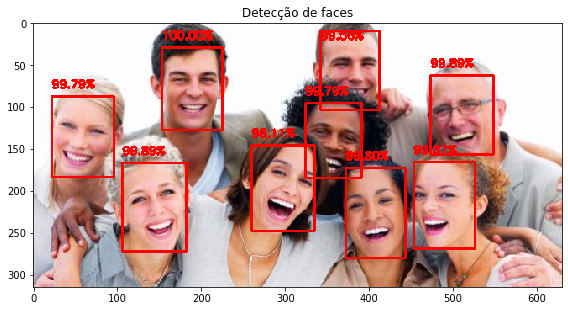

In [8]:
# Plot de result detection
plt.figure(figsize=(8,7))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Detecção de faces')
plt.tight_layout()
plt.show()